In [60]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from sklearn.preprocessing import PowerTransformer
sns.set_theme(style='whitegrid')

In [64]:
# データの読み込み
path = '../../data/SPEEDA/CompanyList_1018/CompanyListProcessed.csv'
df = pd.read_csv(path, header=0, encoding='cp932')
# print(df.columns)

# BCPデータの読み込み
path = '../../data/SPEEDA/CompanyList_1018/CompanyListBinded.csv'
bcp = pd.read_csv(path, header=0, encoding='cp932')
bcp = bcp[['stock_code', 'year', 'BCP', 'BCP_first', 'BCP_dev']]
bcp = bcp.query('year <= 2020')

# Yeo-Johnsonデータの読み込み
path = '../../data/Analysis/analysis_data.csv'
df_yj = pd.read_csv(path, header=0, encoding='cp932')
# print(df_yj.columns)

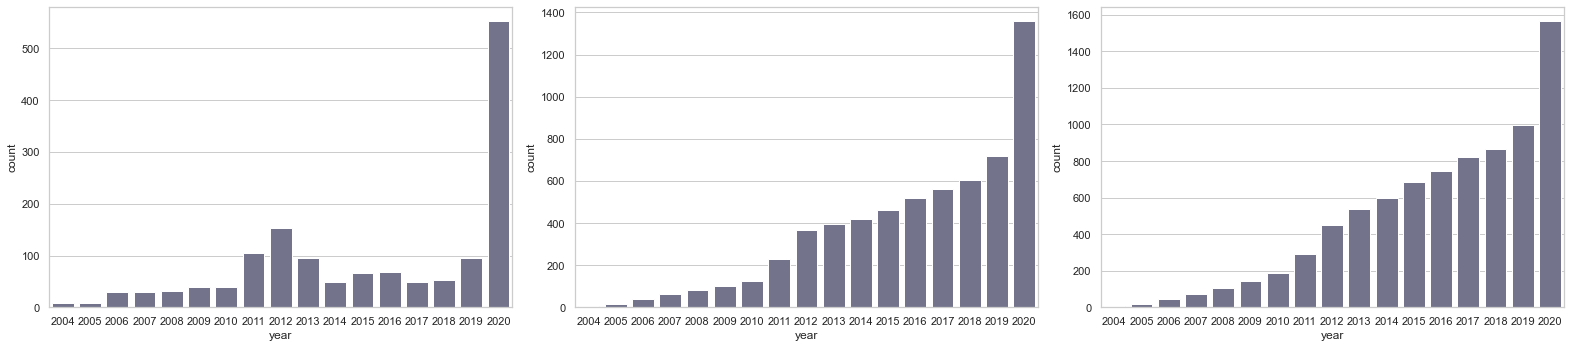

In [67]:
# BCP開示初年度の分布
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(22, 5))
sns.countplot(data=bcp.query('BCP_first == 1'), x='year', color='blue', saturation=0.1, ax=ax[0])
sns.countplot(data=bcp.query('BCP == 1'), x='year', color='blue', saturation=0.1, ax=ax[1])
sns.countplot(data=bcp.query('BCP_dev == 1'), x='year', color='blue', saturation=0.1, ax=ax[2])
plt.tight_layout()
plt.show()

In [4]:
# 要約統計量
r = list(range(1, 10, 1))
r = list(map(lambda x: x / 10, r))
df.describe(percentiles=r)

,stock_code,year,month,establishment,accounting_code,prefecture_code,indcode_small,indcode_large,sales,operating_profit,...,lag_b_earthquake,lag_b_covid_19,lag_b_turnover,lag_b_sensitivity_anlysis,count,min,row,correct_year,b_turnover_cumsum,b_sensitivity_anlysis_cumsum
count,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,2.966200e+04,29662.000000,...,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000
mean,5905.715427,2014.352505,4.222237,1956.789326,1.970029,17.440294,4704.313600,8.521206,1.821541e+05,10097.728542,...,0.646517,0.057076,0.111287,0.009811,13.122177,2008.722945,5.629560,2014.352505,0.756995,0.042681
std,2396.477203,4.043625,2.875471,25.411642,0.231991,7.493647,1902.437627,4.090940,5.817971e+05,34204.459847,...,0.478059,0.231992,0.314493,0.098563,2.965209,2.350504,4.010133,4.043625,0.874677,0.363444
min,1301.000000,2006.000000,1.000000,1875.000000,0.000000,1.000000,50.000000,1.000000,2.640000e+02,-406119.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,2006.000000,0.000000,0.000000
10%,2433.000000,2009.000000,3.000000,1923.000000,2.000000,13.000000,3050.000000,3.000000,6.470100e+03,58.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,2007.000000,0.000000,2009.000000,0.000000,0.000000
20%,3382.000000,2010.000000,3.000000,1938.000000,2.000000,13.000000,3200.000000,4.000000,1.163240e+04,344.000000,...,0.000000,0.000000,0.000000,0.000000,13.000000,2008.000000,2.000000,2010.000000,0.000000,0.000000
30%,4344.000000,2012.000000,3.000000,1946.000000,2.000000,13.000000,3550.000000,6.000000,1.860960e+04,673.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,2008.000000,3.000000,2012.000000,0.000000,0.000000
40%,5232.000000,2013.000000,3.000000,1949.000000,2.000000,13.000000,3650.000000,8.000000,2.756580e+04,1102.000000,...,1.000000,0.000000,0.000000,0.000000,14.000000,2008.000000,4.000000,2013.000000,0.000000,0.000000
50%,6266.000000,2014.000000,3.000000,1953.000000,2.000000,13.000000,3700.000000,9.000000,3.984850e+04,1759.000000,...,1.000000,0.000000,0.000000,0.000000,14.000000,2008.000000,5.000000,2014.000000,1.000000,0.000000
60%,6787.600000,2016.000000,3.000000,1961.000000,2.000000,14.000000,5180.000000,10.000000,5.782140e+04,2812.200000,...,1.000000,0.000000,0.000000,0.000000,14.000000,2008.000000,7.000000,2016.000000,1.000000,0.000000


In [5]:
# 要約統計量
r = list(range(0, 100, 10))
r = list(map(lambda x: x / 100, r))
summary = df_yj.loc[:, [
    'year',
    'prefecture', 'indname_small', 'indname_large', 'yj_sales_growth',
    'yj_total_assets', 'yj_operating_cash_flow', 'yj_ros',
    'yj_cash_deposit_ratio', 'yj_leverage', 'yj_stock_price_growth',
    'yj_net_profit_growth', 'yj_firm_age', 'yj_fixed_assets_ratio',
    'earthquake'
    ]]
# summary.describe(percentiles=r)
summary.describe()

,year,yj_sales_growth,yj_total_assets,yj_operating_cash_flow,yj_ros,yj_cash_deposit_ratio,yj_leverage,yj_stock_price_growth,yj_net_profit_growth,yj_firm_age,yj_fixed_assets_ratio,earthquake
count,21781.000000,21781.000000,21781.000000,21781.000000,21781.000000,21781.000000,21781.000000,21781.000000,21781.000000,21781.000000,21781.000000,21781.000000
mean,2014.411873,-0.030762,0.137057,0.042533,-0.017155,-0.061842,0.030727,0.023863,-0.003476,0.168996,0.044381,0.708645
std,4.004887,0.948833,0.980672,1.082253,0.941833,0.962741,0.983407,0.985825,0.986457,0.951403,0.971458,0.454397
min,2007.000000,-9.486495,-4.809060,-11.630824,-8.484177,-2.569035,-2.191202,-4.631878,-8.630666,-2.374849,-1.943864,0.000000
25%,2011.000000,-0.385228,-0.519916,-0.227478,-0.484465,-0.728882,-0.742346,-0.454503,-0.148470,-0.393776,-0.638793,0.000000
50%,2014.000000,0.030642,0.123580,-0.164201,-0.140828,-0.069467,-0.003203,0.073596,0.036417,0.233326,-0.003612,1.000000
75%,2018.000000,0.401082,0.788601,0.026711,0.319626,0.591975,0.775356,0.533310,0.165712,0.694115,0.738894,1.000000
max,2021.000000,11.441662,3.341883,11.422683,5.579899,3.060659,2.509726,3.944336,9.942790,3.096016,2.471238,1.000000


In [198]:
# カテゴリカルデータ
df.describe(exclude='number')

,firm_name,prefecture,indname_small,indname_large,lag_prefecture
count,27352,27352,27352,27352,27352
unique,2658,44,32,16,44
top,和井田製作所,東京都,卸売業,情報通信・サービスその他,東京都
freq,14,14421,2858,5154,14421


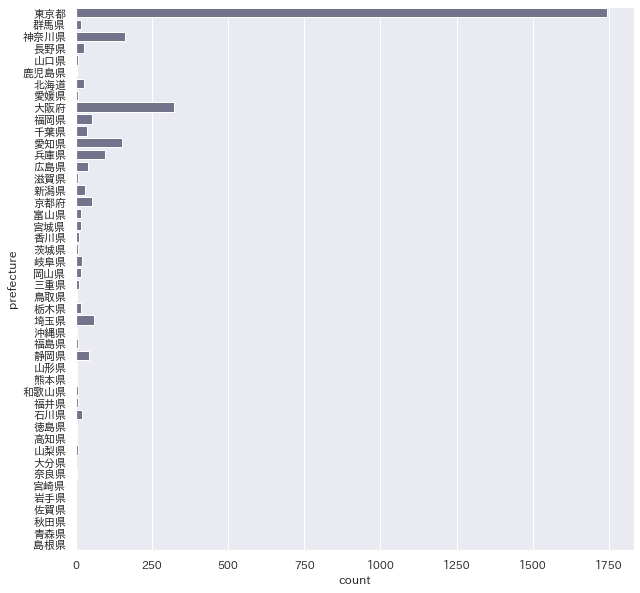

In [64]:
# prefecture
prefecture = df_yj.drop_duplicates(subset=['stock_code'])
sns.set(font='IPAexGothic')
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(data=prefecture, y='prefecture', color='blue', saturation=0.1)
plt.show()

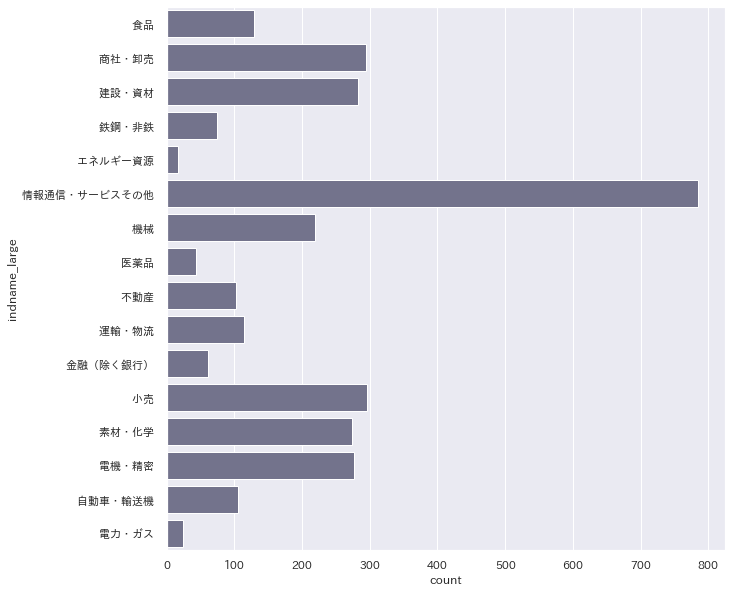

In [65]:
# industry
industry = df_yj.drop_duplicates(subset=['stock_code'])
sns.set(font='IPAexGothic')
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(data=industry, y='indname_large', color='blue', saturation=0.1)
plt.show()

In [224]:
# 日付データ
y = df['year']
y.describe()

count    28279.000000
mean      2014.789172
std          3.733857
min       2008.000000
25%       2012.000000
50%       2015.000000
75%       2018.000000
max       2021.000000
Name: year, dtype: float64

In [ ]:
df.columns

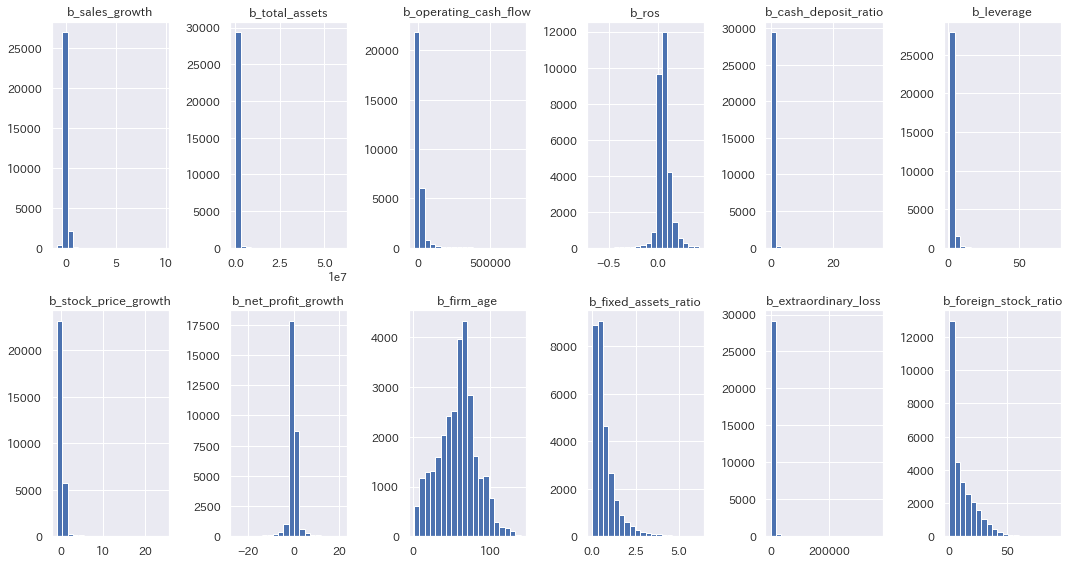

In [71]:
h = df[[
    'b_sales_growth', 'b_total_assets', 'b_operating_cash_flow', 'b_ros', 'b_cash_deposit_ratio', 'b_leverage', 
    'b_stock_price_growth', 'b_net_profit_growth', 'b_firm_age', 'b_fixed_assets_ratio', 'b_extraordinary_loss', 
    'b_foreign_stock_ratio'
    ]]

def draw_hist(s, row, col, q_min=0, q_max=1):
    qmin = s.quantile(q_min)
    qmax = s.quantile(q_max)
    s2 = s[(qmin <= s) & (s <= qmax)]
    axes[row][col].set_title(s2.name)
    axes[row][col].hist(s2, bins=20)

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 8))
k = 0
for i in range(2):
    for j in range(6):
        s = h.iloc[:, k]
        draw_hist(s=s, row=i, col=j)
        k += 1

plt.tight_layout()

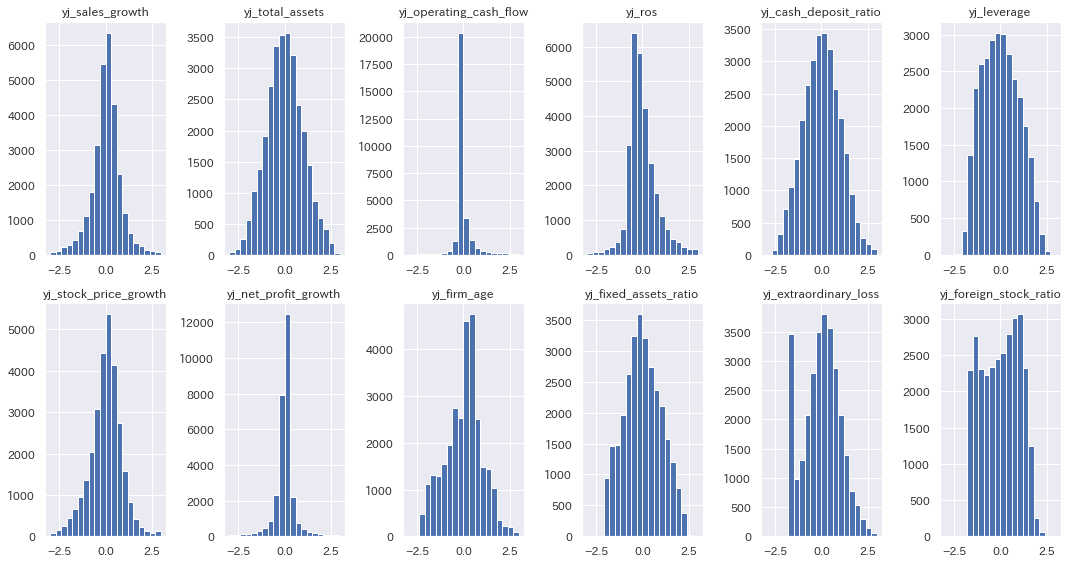

In [68]:
def draw_hist(s, row, col, q_min=0, q_max=1, x_min=-2, x_max=2):
    qmin = s.quantile(q_min)
    qmax = s.quantile(q_max)
    s2 = s[(qmin <= s) & (s <= qmax)]
    axes[row][col].set_title(s2.name)
    axes[row][col].hist(s2, range=(x_min, x_max), bins=20)

cols = [c for c in df_yj.columns if ('yj_' in c) & ~('lag_' in c)]
h = df_yj[cols]
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 8))
k = 0
for i in range(2):
    for j in range(6):
        s = h.iloc[:, k]
        draw_hist(s=s, row=i, col=j, x_min=-3, x_max=3)
        k += 1

plt.tight_layout()

<AxesSubplot:>

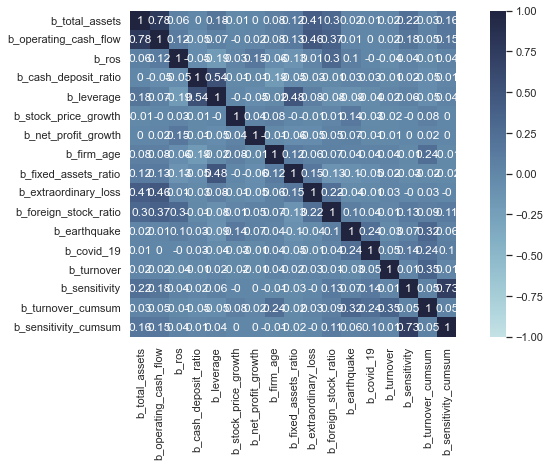

In [59]:
# 調整前相関行列
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cols = [c for c in df.columns if c.startswith('b_')]
cols.remove('b_sales_growth')
corr = df[cols].corr(method='pearson')
corr = corr.apply(lambda x: round(x, 2))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, center=0, vmin=-1, vmax=1, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

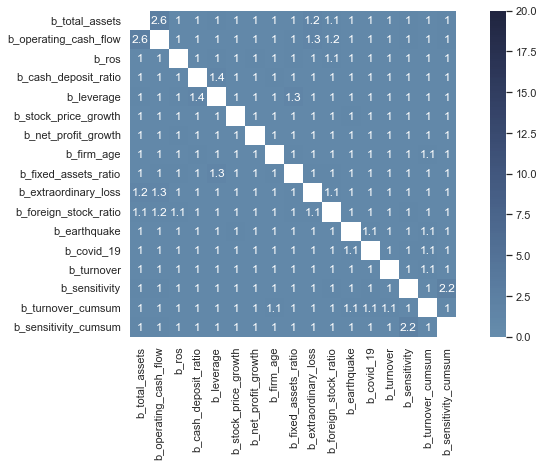

In [60]:
# 調整前VIF統計量
cols = [c for c in df.columns if c.startswith('b_')]
cols.remove('b_sales_growth')
corr = df[cols].corr(method='pearson')
vif = corr.apply(lambda x: x.apply(lambda y: 1 / (1 - math.pow(y, 2) if not y == 1 else np.nan)))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(vif, annot=True, center=1, vmin=0, vmax=20, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

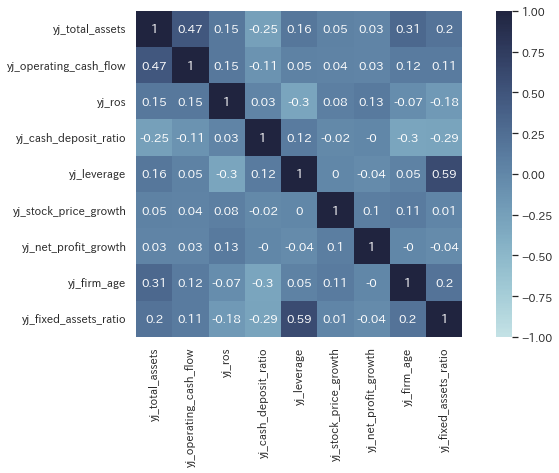

In [231]:
# 調整後相関行列
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cols = [c for c in df_yj.columns if c.startswith('yj_')]
cols.remove('yj_sales_growth')
corr = df_yj[cols].corr(method='pearson')
corr = corr.apply(lambda x: round(x, 2))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, center=0, vmin=-1, vmax=1, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

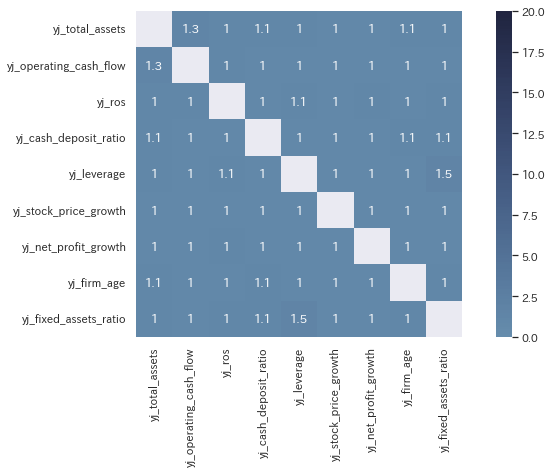

In [232]:
# 調整後VIF統計量
cols = [c for c in df_yj.columns if c.startswith('yj_')]
cols.remove('yj_sales_growth')
corr = df_yj[cols].corr(method='pearson')
vif = corr.apply(lambda x: x.apply(lambda y: 1 / (1 - math.pow(y, 2) if not y == 1 else np.nan)))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(vif, annot=True, center=1, vmin=0, vmax=20, ax=ax, cmap=cmap, square=True)